In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
from secret import KEY, SECRET
from pathlib import Path
from binance import Client
from data import get_and_preprocess_data

client = Client(KEY, SECRET)
start = '1 Jan 2023'
end = '2 Oct 2023'
symbol = 'BTCUSDT'
interval = Client.KLINE_INTERVAL_1DAY
dir = 'data'

path = Path(dir) / f'{symbol}_{interval}_data.csv'
if path.exists():
    print('Data already exist (symbol and klines).')
    data = pd.read_csv(path)
else:
    data = get_and_preprocess_data(binance_client=client, 
                                   start=start, 
                                   end=end, 
                                   symbol=symbol, 
                                   interval=interval, 
                                   save=True, 
                                   dir=dir)
data

Data already exist (symbol and klines).


,Timestamp,Open,High,Low,Close,Volume
0,2023-01-01,16541.77,16628.00,16499.01,16616.75,96925.41374
1,2023-01-02,16617.17,16799.23,16548.70,16672.87,121888.57191
2,2023-01-03,16672.78,16778.40,16605.28,16675.18,159541.53733
3,2023-01-04,16675.65,16991.87,16652.66,16850.36,220362.18862
4,2023-01-05,16850.36,16879.82,16753.00,16831.85,163473.56641
...,...,...,...,...,...,...
270,2023-09-28,26373.00,27308.48,26342.40,27021.39,44517.83491
271,2023-09-29,27021.39,27244.89,26665.16,26906.96,28478.76219
272,2023-09-30,26906.96,27094.99,26886.31,26962.56,12804.62307
273,2023-10-01,26962.57,28065.51,26954.09,27992.57,24602.81468


In [18]:
import environment
from environment import TradingEnvironment
import importlib
importlib.reload(environment)

env = TradingEnvironment(data=data,
                         initial_balance=500000,
                         transaction_fee=10)

In [19]:
np.random.seed(42)

balances = []
portfolios = []
positions = []
for i in range(len(data)):
    # if i == 1:
    #     action = -1
    # else:
    #     action = 0

    action = np.random.choice([-1, 0, 0, 0, 0, 0, 0, 0, 1])
    volume = np.random.choice(range(6))+1
    # volume = 50

    print(i)

    game_over, balance, position = env.step(action, volume)
    print(position)

    balances.append(balance)
    portfolios.append(env.portfolio_value)
    positions.append(position)
    print()
    if game_over:
        break

0
Holding position.
PositionType.HOLD

1
Holding position.
PositionType.HOLD

2
Holding position.
PositionType.HOLD

3
Holding position.
PositionType.HOLD

4
Holding position.
PositionType.HOLD

5
Holding position.
PositionType.HOLD

6
Holding position.
PositionType.HOLD

7
Holding position.
PositionType.HOLD

8
Holding position.
PositionType.HOLD

9
Holding position.
PositionType.HOLD

10
Holding position.
PositionType.HOLD

11
Opened new LONG position:
Volume: 1
Purchase Price: 17943.26
Cost: 17943.26
PositionType.LONG

12
Holding position.
PositionType.HOLD

13
Holding position.
PositionType.HOLD

14
Bought more LONG position:
Additional Volume: 3
Updated Purchase Price: 20200.385
Cost: 62858.28
PositionType.LONG

15
Holding position.
PositionType.HOLD

16
Holding position.
PositionType.HOLD

17
Bought more LONG position:
Additional Volume: 2
Updated Purchase Price: 20511.02
Cost: 42264.58
PositionType.LONG

18
Holding position.
PositionType.HOLD

19
Holding position.
PositionType.H

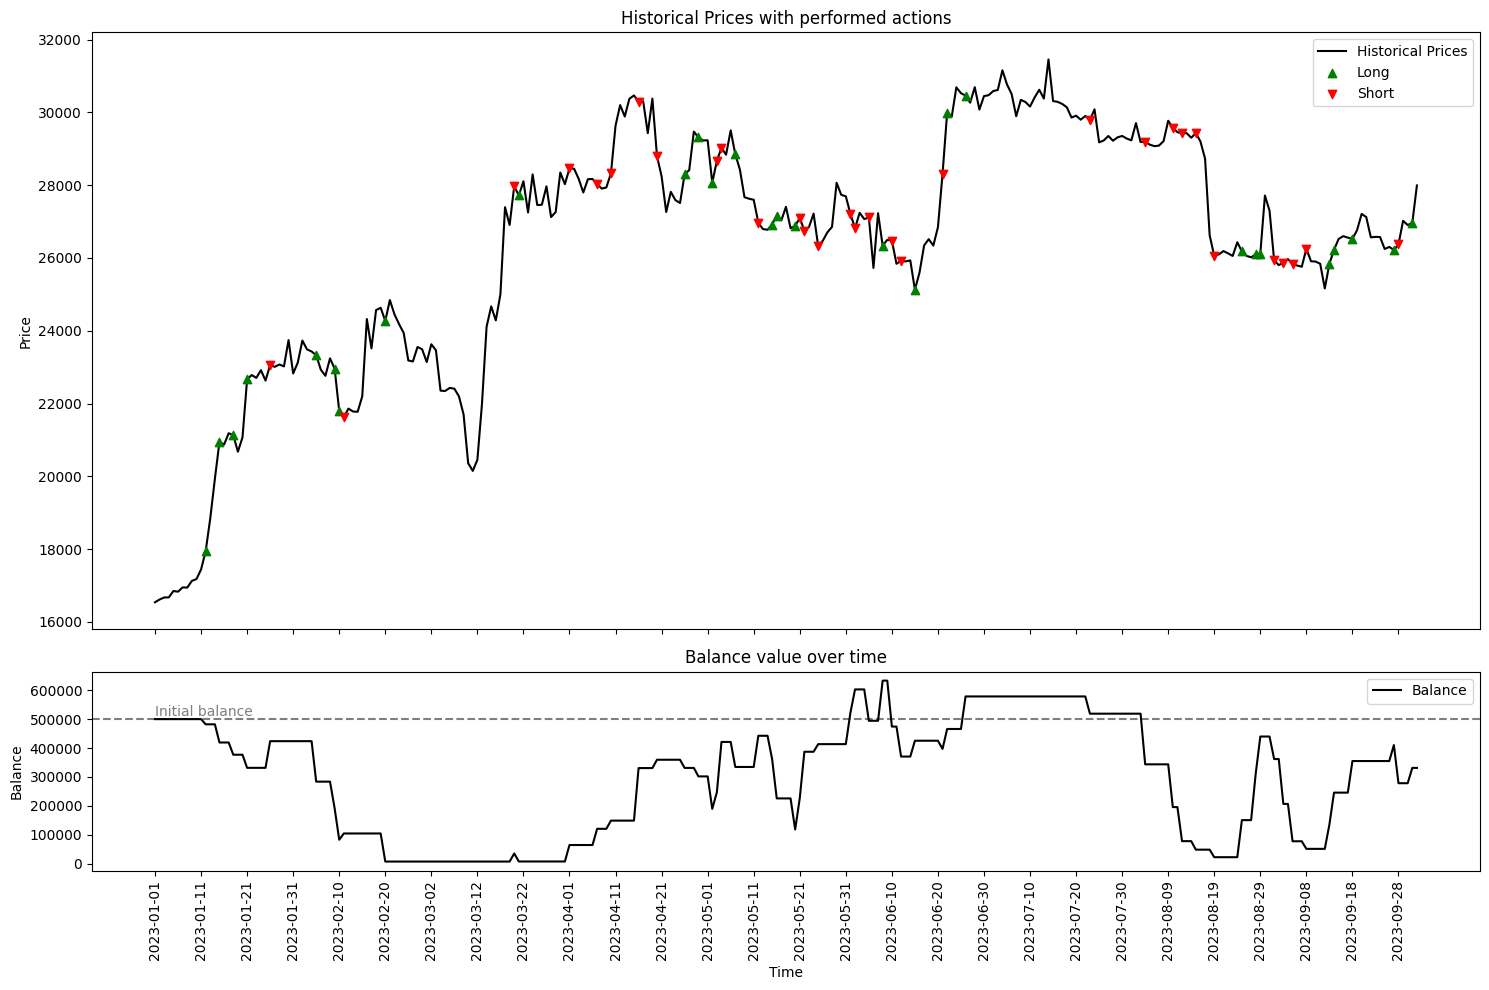

In [20]:
from environment import PositionType

# Initialize a figure and axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# First subplot
# Plot the historical prices
ax1.plot(data['Timestamp'], data['Open'], label='Historical Prices', color='black', zorder=1)

# Separate lists for buy and sell points
long_positions = 0
short_positions = 0

# Add markers for buy and sell transactions
for i, position in enumerate(positions):
    if position == PositionType.LONG:
        long_positions += 1
        color, marker, label, add_legend = 'green', '^', 'Long', long_positions == 1
    elif position == PositionType.SHORT:
        short_positions += 1
        color, marker, label, add_legend = 'red', 'v', 'Short', short_positions == 1
    else:
        continue  # Skip if position is not Long or Short

    ax1.scatter(data['Timestamp'][i], 
                data['Open'][i], 
                color=color, 
                marker=marker, 
                label=label if add_legend==True else '', 
                clip_on=False, 
                zorder=2)

# Set labels and title
ax1.set_title('Historical Prices with performed actions')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

# Second subplot
# Plot the balance value on the second subplot
ax2.plot(data['Timestamp'], balances, color='black', label='Balance')

# Horizontal line for balance
ax2.axhline(y=env.initial_balance, color='black', linestyle='--', alpha=0.5)
ax2.text(data['Timestamp'].iloc[0], env.initial_balance+10000, f'Initial balance', color='black', ha='left', alpha=0.5)

# Set labels and title for the second subplot
ax2.set_title('Balance value over time')
ax2.set_ylabel('Balance')
ax2.set_xlabel('Time')
ax2.legend(loc='best')

# Rotate x-axis labels and display every 10th label
for label in ax2.get_xticklabels():
    label.set_rotation(90)
ax2.set_xticks(ax2.get_xticks()[::10])

plt.tight_layout() 

plt.show()